<center><h1>Universidad Politecnica Salesisna</h1></center>
<center><h2>Trabjo de Covid-19 en Ecuador</h2></center>
<center><h3>Jonnathan Uzhca Christian Fajardo</h3></center>
<center><h4>juzhcaf@est.ups.edu.ec</h4></center>

Vamo a analisar el problema de la infeccion del virus que estas asostando a todo el mundo hasta hoy, vamos a relizar un modelo que nos permita determinar como ha hido creciendo el COVID-19 en el Ecuador vamos a ver un corpues de datos que nos permita verificar como estas creciendo la infeccion tanto como contagiados y muertos.

Vamos a constatar como  fueron sucediendo los casos de contagias y muertes desde el "1 de marzo del 2020" en el pais (Ecuador).

Para determinar como sucedio esto  vamso a realizar un modelo, se realizaras mediante datos reales como el numero de contagiados y numero de muertos hasta esta fecha, de modo que  vamsoa a  plicar el modelos de regrecion lineal y  logaritmica para formular nuestro problems y hascer una simulacon que nos permita verificar como esta creciendo.

Para ellos vamos a utilizar la herramienta  de lengua de programacion de "PYTHON" con librerias quenos ayuden  a relaizarlas siguentes modelos.


## Desarrollo de modelos para la interpretacion del COVID-19

### PASO 1.

Vamos a importar todas las librerias que vamos a utilizar para desarrollar los modelos

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

## Vamos a desarrollar una funcion 

In [2]:
def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

### Vamos a  leer los datos del curpos que nos descargamso para realizar este trabajo

In [3]:
df = pd.read_csv('owid-covid-data.csv').fillna(0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54385,0,0,International,2020-10-30,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54386,0,0,International,2020-10-31,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54387,0,0,International,2020-11-01,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54388,0,0,International,2020-11-02,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


## Vamos a filtar los datos

Vamos a filtar los datos segun el pais que deceamos lo cual es ecuador 

In [4]:
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)]
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
14430,ECU,South America,Ecuador,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14431,ECU,South America,Ecuador,2020-03-02,6.0,5.0,0.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14432,ECU,South America,Ecuador,2020-03-03,7.0,1.0,1.000,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14434,ECU,South America,Ecuador,2020-03-05,10.0,3.0,1.429,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14435,ECU,South America,Ecuador,2020-03-06,13.0,3.0,1.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14673,ECU,South America,Ecuador,2020-10-30,166302.0,1394.0,1407.286,12622.0,14.0,17.429,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14674,ECU,South America,Ecuador,2020-10-31,167147.0,845.0,1268.143,12632.0,10.0,14.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14675,ECU,South America,Ecuador,2020-11-01,168192.0,1045.0,1225.429,12670.0,38.0,18.286,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
14676,ECU,South America,Ecuador,2020-11-02,169194.0,1002.0,1079.857,12684.0,14.0,18.714,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752


## Vamos a  filtar los datos que necesitamos para  los arreglos de X y Y

Los datos que vamsoa  filtrar son:

    -Fecha
    -Total de casos
    -Total de muertos

In [6]:
ndf1=ndf[['date','total_cases','total_deaths']]
ndf1

,date,total_cases,total_deaths
14430,2020-03-01,1.0,0.0
14431,2020-03-02,6.0,0.0
14432,2020-03-03,7.0,0.0
14434,2020-03-05,10.0,0.0
14435,2020-03-06,13.0,0.0
...,...,...,...
14673,2020-10-30,166302.0,12622.0
14674,2020-10-31,167147.0,12632.0
14675,2020-11-01,168192.0,12670.0
14676,2020-11-02,169194.0,12684.0


In [7]:
nombre =["Fechas", "Total de cosas", "Total de muertos"]
ndf1.columns=nombre
ndf1

,Fechas,Total de cosas,Total de muertos
14430,2020-03-01,1.0,0.0
14431,2020-03-02,6.0,0.0
14432,2020-03-03,7.0,0.0
14434,2020-03-05,10.0,0.0
14435,2020-03-06,13.0,0.0
...,...,...,...
14673,2020-10-30,166302.0,12622.0
14674,2020-10-31,167147.0,12632.0
14675,2020-11-01,168192.0,12670.0
14676,2020-11-02,169194.0,12684.0


## Vamos a crear los arreglos

In [12]:
x=np.arange(1,len(ndf1)+1,1) 
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

# Implementacion de los Modelos 

## Regracion Lineal
Vamos a empezar el modelo de la regresion lineal vamos a crearnos un instancias de LinearRegression para poder asignar los datos de ingreso para nuestro modelo

In [13]:
regresion_lineal = LinearRegression() 
regresion_lineal.fit(x.reshape(-1,1), y) 

LinearRegression()

In [14]:
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'

## Graficas de los datos CORPUS 

Graficamos los datos tomados del curpos tanto como caso de muertos como casos de contagiados 

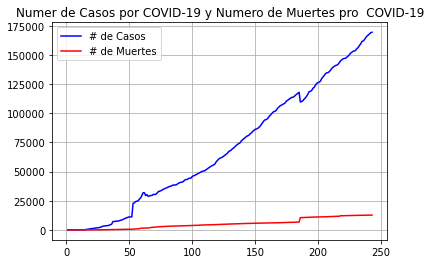

In [19]:
plt.plot(x,y,label='# de Casos', color='blue')
plt.plot(x,y1,label='# de Muertes', color='red')
plt.grid(True)
plt.legend()
plt.title('Numer de Casos por COVID-19 y Numero de Muertes pro  COVID-19');

## Vamos a  implementar los datos a la regresion

Ingresamos los parametros  que se eta  estimando  en  el  modelo para  ello vamos a graficar para pdoer representar los datos  con la regresion lineal para tener una mejor vista del  modelo

### Grafica por  Numero de Cosas pro COVID-19

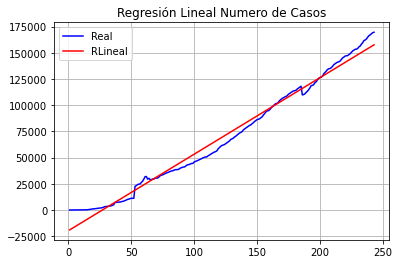

In [36]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_

plt.plot(x,y,label='Real', color='blue')
plt.grid(True)

plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+1,1)
plt.plot(x1,fun(x1),color='red',label='RLineal')
plt.legend()
plt.show()

### Graficas por Numero de Muertes por COVID-19

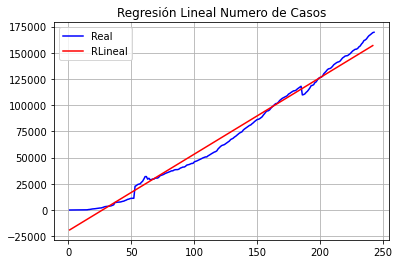

In [40]:
plt.plot(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1),1)
plt.plot(x1,fun(x1),color='red',label='RLineal')
plt.legend()
plt.show()

## Regresion Logaritmica

Vamos impotar  todas las librerias que necesitamos para realizar estas modelo

In [41]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression

### Vamos a crearnos una funcion 

In [42]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

### Extrasccion de lso datos
Vamos a estraer los datos a entrenar para las regresion logaritmica, vamos a estraer los datos:

    - Fechas
    - Total de casos
    - Total de muertos

In [43]:
exp_fit = curve_fit(modelo_logistico,x,y) 
exp_fit1 = curve_fit(modelo_logistico,x,y1)

## Prediccion

Vamos a hacer uan prediccion de 50  dias  para ver como estas los contagios y las muertes por  el COVID-19 

In [46]:
pred_x = list(range(min(x),max(x)+50))

## Vamos a graficar los datos a predecir por "CASOS  POR COVID-19"

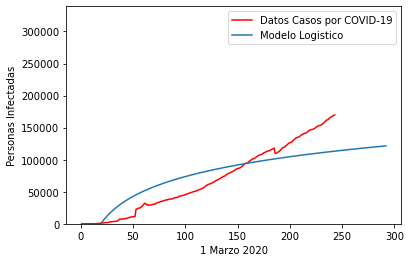

In [50]:
plt.plot(x,y,label="Datos Casos por COVID-19",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("1 Marzo 2020")
plt.ylabel("Personas Infectadas")
plt.ylim(0,max(y)*2)
plt.show()

## Vamos a graficar los datos a predecir por "MUERTES POR COVID-19"

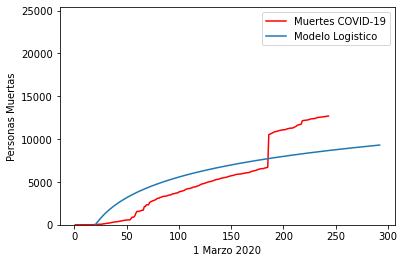

In [52]:
plt.plot(x,y1,label="Muertes COVID-19",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("1 Marzo 2020")
plt.ylabel("Personas Muertas")
plt.ylim(0,max(y1)*2)
plt.show()

## Interpretación
Se a relizado los modelos  tanto como la regresion lineal y las regresion logaritmica, como podemos imterpretar los valor de lso dos modelso podemos decir que el modelo logaritmico nos da un marge de error los datos no son en un tiempo determinado y  no se puede dar una mejor visualizacion de los datos  ya que con ello tiene un margen de error mientras que el  modelo  de la regresion lineal tiene un error minimo y se puede ver mejor los datos  y se puede ver como los se acercan a las variables dependientes

## Implementación
Se implemeto  estos dos modelos para el desarrollo de este problema de pandemia que se esta viviendo  en todo el mundo.

## Documentación
    
    - D. Quisi, "Simulación Python", GitHub, 2020. [Online]. Habilitado: ttps://github.com/dquisi/SimulacionPython/blob/master/RegresionTotal.ipynb. [Accessed: 01- Nov- 2020].
    
    - https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
    
    - https://www.generacodice.it/es/articolo/648698/How-to-do-exponential-and-logarithmic-curve-fitting-in-Python-I-found-only-polynomial-fitting
   